In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt

In [102]:
from google.colab import files
uploaded = files.upload()
names = pd.read_csv('names.csv')

Saving names.csv to names.csv


In [103]:
from google.colab import files
uploaded = files.upload()
storms = pd.read_csv('storms.csv')

Saving storms.csv to storms.csv


In [104]:
joined = pd.merge(names,storms,left_on=names['Name'],right_on=storms['name'])

In [105]:
joined[['name','year']].value_counts() # approximately 500 unique storms

name      year
Nadine    2012    96
Ivan      2004    94
Kyle      2002    90
Leslie    2018    89
Paulette  2020    88
                  ..
Eight     2013     4
AL092003  2003     4
AL022003  2003     4
AL092001  2001     4
Ten       2007     4
Length: 525, dtype: int64

In [106]:
bar = joined.groupby(['year','name']).Gender.value_counts().to_frame()
bar  = bar.rename(columns={'Gender': 'Count'}).reset_index().sort_values('year')
bar = bar.groupby('year').Gender.value_counts().to_frame()
bar = bar.rename(columns={'Gender': 'Count'}).reset_index().sort_values('year')
female = bar.query('Gender == "F"')
male = bar.query('Gender == "M"')
missing_years = {'year' : [1975,1976,1977,1978],'Count' : [0,0,0,0]}
new = pd.DataFrame(missing_years)
new_male = pd.concat([new,male],axis=0)
#some storms did not have a gender, such as AL092003
new_male

,year,Count,Gender
0,1975,0,NaN
1,1976,0,NaN
2,1977,0,NaN
3,1978,0,NaN
4,1979,4,M
7,1980,4,M
9,1981,2,M
10,1982,3,M
13,1983,2,M
14,1984,6,M


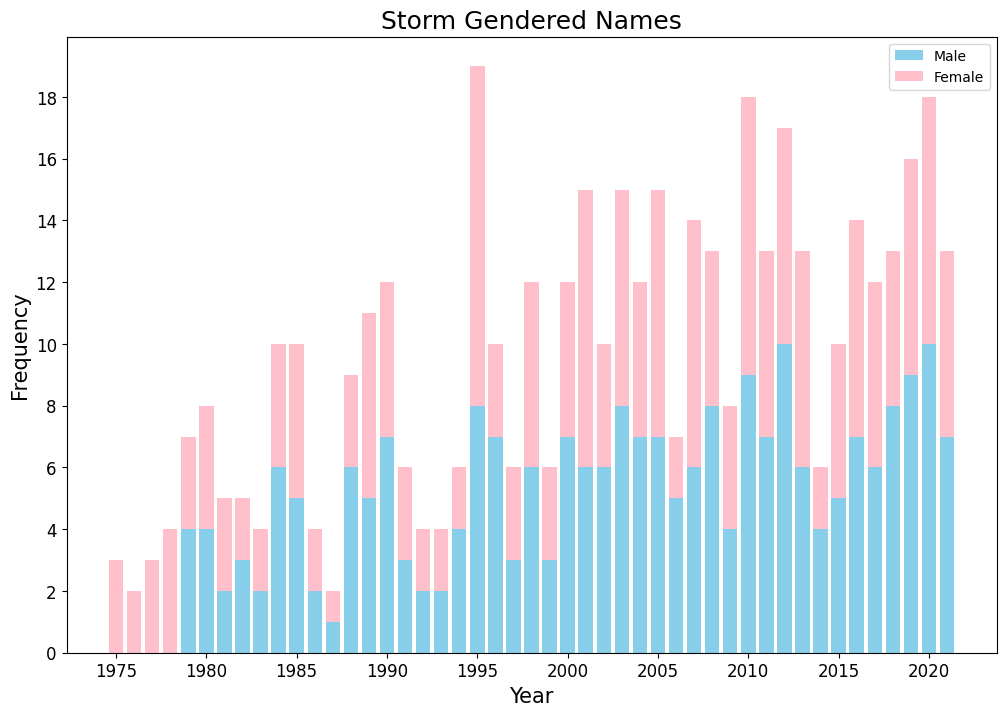

In [107]:
bottom = new_male.Count
fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(1975,2022,1),new_male.Count,color='skyblue',label='Male')
plt.bar(np.arange(1975,2022,1),female.Count,bottom=bottom,color='pink',label='Female')
plt.title('Storm Gendered Names',fontsize=18)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(np.arange(1975,2022,5),fontsize=12)
plt.yticks(np.arange(0,20,2),fontsize=12)
plt.legend()

This is a graph of the number of storms in the US with male and female for each year from 1975 to 2021. There seem to be around an equal number of male and female names for most years, except from the years 1975-1979 when the storms only had female names. I picked light blue and pink because both are traditionally associated with male and female respectively. I think it looks cuter when they are light colors vs. more saturated colors.

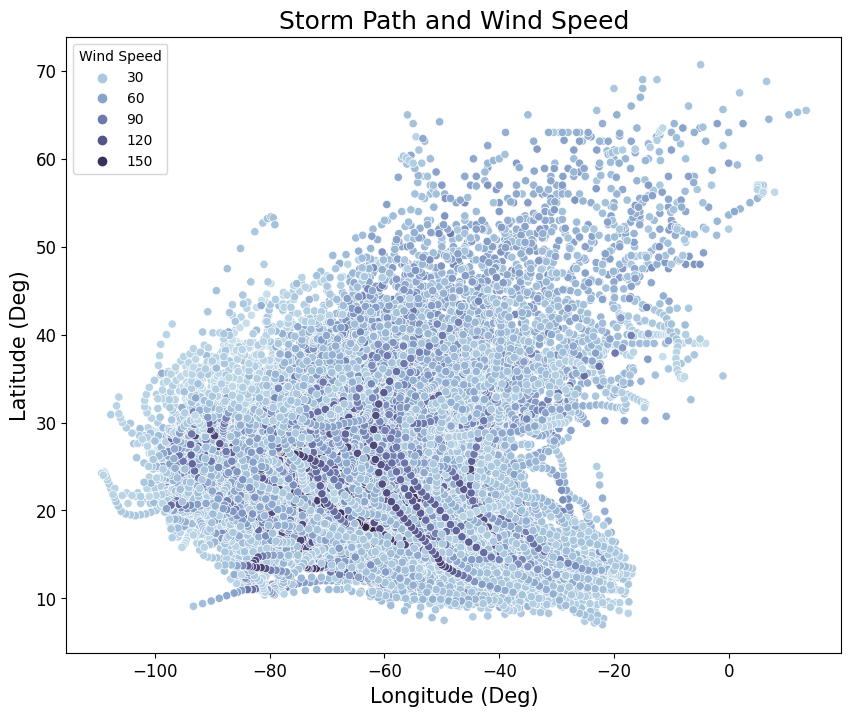

In [108]:
import seaborn as sns
figure = plt.figure(figsize=(10,8))
sns.scatterplot(data=storms,x='long',y='lat',hue='wind',palette="ch:s=.25,rot=-.25")
plt.title('Storm Path and Wind Speed',fontsize=18)
plt.xlabel('Longitude (Deg)',fontsize=15)
plt.ylabel('Latitude (Deg)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Wind Speed')

# New Section

This graph is an overplotted scatter plot of the path of each storm from 1975 to 2021, with longitude and latitude on the x and y axis. When the storm has higher wind speed the color is darker. I picked a blue palette from seaborn because it reminds me of wind. Different shades of the same color illustrates this better than going through different colors in some sequential order.

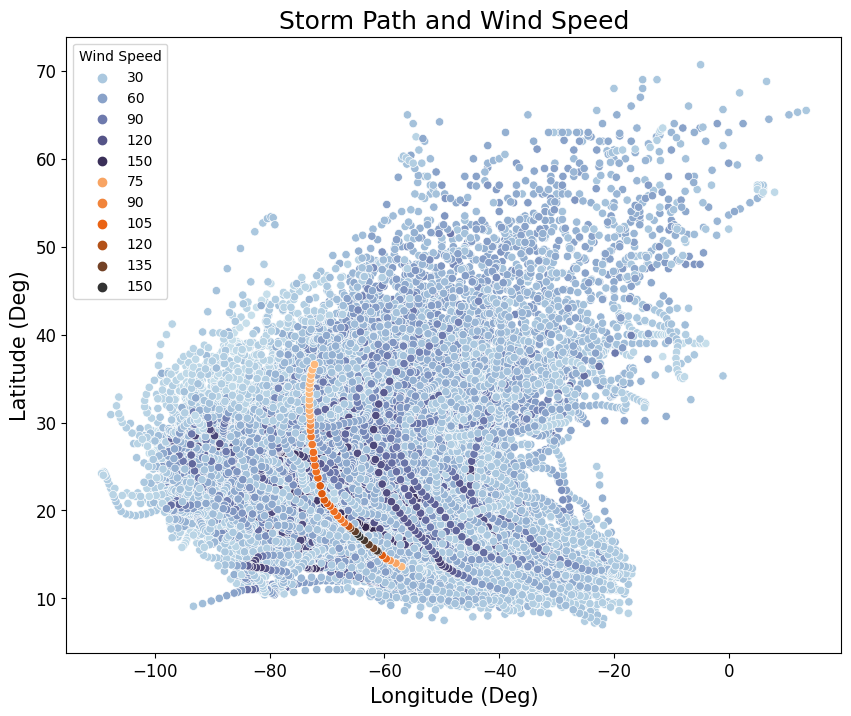

In [110]:
figure = plt.figure(figsize=(10,8))
sns.scatterplot(data=storms,x='long',y='lat',hue='wind',palette="ch:s=.25,rot=-.25")
maria = storms.loc[(storms['name']=='Maria')&(storms['year']==2017)].dropna().drop(columns='Unnamed: 0')
sns.scatterplot(maria,x='long',y='lat',hue='wind',palette='Oranges_d')
plt.title('Storm Path and Wind Speed',fontsize=18)
plt.xlabel('Longitude (Deg)',fontsize=15)
plt.ylabel('Latitude (Deg)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Wind Speed')

I chose orange because it is on the opposite side of the color wheel, so it will stand out against the blue. I picked Oranges_d (dark) rather than Oranges because the smaller values of wind speed made some of the dots white. I wanted them all to have a color to see more clearly.

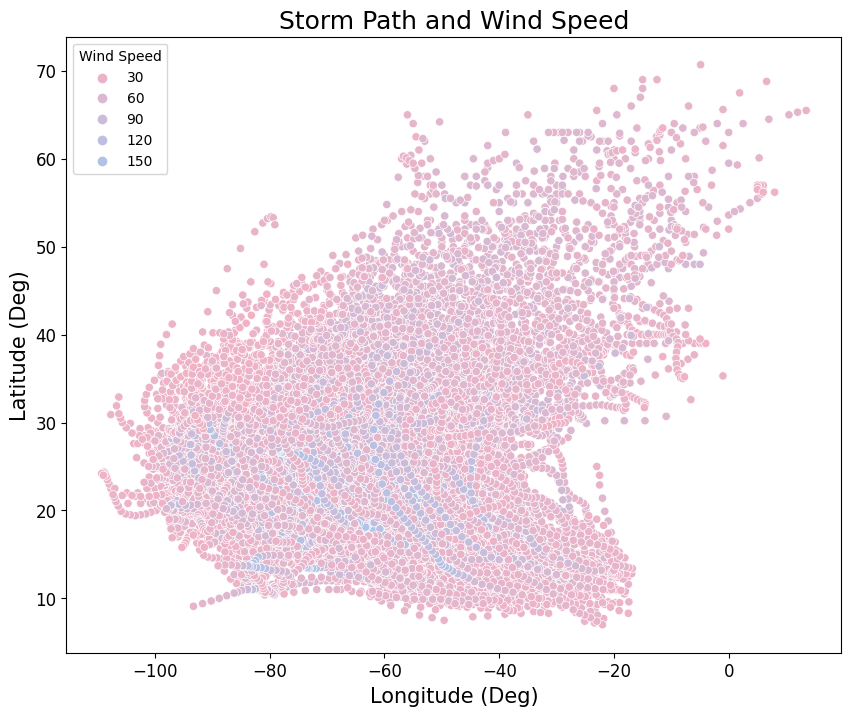

In [111]:
figure = plt.figure(figsize=(10,8))
sns.scatterplot(data=storms,x='long',y='lat',hue='wind',palette="blend:#f2b2c4,#a9c5eb")
plt.title('Storm Path and Wind Speed',fontsize=18)
plt.xlabel('Longitude (Deg)',fontsize=15)
plt.ylabel('Latitude (Deg)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Wind Speed')

Inspired by BTS Love Yourself: Answer Album Cover. I just love pastel colors. The contrast is not very high though.

In [5]:
pip install datapackage

In [6]:
import datapackage
data_url = 'https://datahub.io/core/gdp/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

      Country Name Country Code  Year         Value
0       Arab World          ARB  1968  2.576068e+10
1       Arab World          ARB  1969  2.843420e+10
2       Arab World          ARB  1970  3.138550e+10
3       Arab World          ARB  1971  3.642691e+10
4       Arab World          ARB  1972  4.331606e+10
...            ...          ...   ...           ...
11502     Zimbabwe          ZWE  2012  1.424249e+10
11503     Zimbabwe          ZWE  2013  1.545177e+10
11504     Zimbabwe          ZWE  2014  1.589105e+10
11505     Zimbabwe          ZWE  2015  1.630467e+10
11506     Zimbabwe          ZWE  2016  1.661996e+10

[11507 rows x 4 columns]
      Country Name Country Code  Year         Value
0       Arab World          ARB  1968  2.576068e+10
1       Arab World          ARB  1969  2.843420e+10
2       Arab World          ARB  1970  3.138550e+10
3       Arab World          ARB  1971  3.642691e+10
4       Arab World          ARB  1972  4.331606e+10
...            ...          ...   ... 

In [7]:
NA = data.loc[data['Country Name'] == 'North America']
Eurasia = data.loc[data['Country Name'] == 'Europe & Central Asia']
East_Asia = data.loc[data['Country Name'] == 'East Asia & Pacific']
Latin_A = data.loc[data['Country Name'] == 'Latin America & Caribbean']
SA = data.loc[data['Country Name'] == 'South Asia']
Sub_Africa = data.loc[data['Country Name'] == 'Sub-Saharan Africa']
Middle_East = data.loc[data['Country Name'] == 'Middle East & North Africa']
World = data.loc[data['Country Name'] == 'World']
regions = pd.concat([NA,Latin_A,Eurasia,Middle_East,Sub_Africa,East_Asia,SA,World],axis=0).reset_index()
regions = regions.drop(columns='index')

In [8]:
gdp2016 = regions.loc[regions['Year'] == 2016]
gdp2016 = gdp2016.reset_index()
#regions = EU, NA, East Asia & Pacific, South Asia, Latin America & Carribean, Sub-Saharan Africa, ME & North Africa

In [9]:
USA = data.loc[(data['Country Name'] == 'United States')&(data['Year']==2016)]
Canada = data.loc[(data['Country Name'] == 'Canada')&(data['Year']==2016)]
Mexico = data.loc[(data['Country Name'] == 'Mexico')&(data['Year']==2016)]
China = data.loc[(data['Country Name'] == 'China')&(data['Year']==2016)]
Japan = data.loc[(data['Country Name'] == 'Japan')&(data['Year']==2016)]
Korea = data.loc[(data['Country Name'] == 'Korea, Rep.')&(data['Year']==2016)]
Germany = data.loc[(data['Country Name'] == 'Germany')&(data['Year']==2016)]
UK = data.loc[(data['Country Name'] == 'United Kingdom')&(data['Year']==2016)]
France = data.loc[(data['Country Name'] == 'France')&(data['Year']==2016)]
India = data.loc[(data['Country Name'] == 'India')&(data['Year']==2016)]
Brazil = data.loc[(data['Country Name'] == 'Brazil')&(data['Year']==2016)]
Indonesia = data.loc[(data['Country Name'] == 'Indonesia')&(data['Year']==2016)]
Turkey = data.loc[(data['Country Name'] == 'Turkey')&(data['Year']==2016)]
Saudi = data.loc[(data['Country Name'] == 'Saudi Arabia')&(data['Year']==2016)]
Argentina = data.loc[(data['Country Name'] == 'Argentina')&(data['Year']==2016)]
Israel = data.loc[(data['Country Name'] == 'Israel')&(data['Year']==2016)]
Nigeria = data.loc[(data['Country Name'] == 'Nigeria')&(data['Year']==2016)]
South_Africa = data.loc[(data['Country Name'] == 'South Africa')&(data['Year']==2016)]
Russia = data.loc[(data['Country Name'] == 'Russian Federation')&(data['Year']==2016)]
Australia = data.loc[(data['Country Name'] == 'Australia')&(data['Year']==2016)]
countries = pd.concat([USA,Canada,China,Japan,Korea,Indonesia,Australia,Germany,UK,France,Russia,India,Turkey,Saudi,Israel,
                       Mexico,Argentina,Brazil,Nigeria,South_Africa],
                      axis=0).reset_index()
east_asia_other = 2.248043*(10**13)-countries['Value'][2:7].sum()
eurasia_other = 2.027384*(10**13)-countries['Value'][7:11].sum()
south_asia_other = 2.892481*(10**12)-countries['Value'][11]
me_other = 3.144798*(10**12)-countries['Value'][12:15].sum()
sa_other = 5.299866*(10**12)-countries['Value'][15:18].sum()
africa_other = 5.299866*(10**12)-countries['Value'][18:20].sum()
other_df = {'Country Name':['East Asia Other','Eurasia Other','South Asia Other','Middle East Other','South America Other','Africa Other'],
            'Value': [east_asia_other,eurasia_other,south_asia_other,me_other,sa_other,africa_other]}
new_df = pd.DataFrame(other_df)
countries = countries.append(new_df,ignore_index='True')
countries

,index,Country Name,Country Code,Year,Value
0,11085.0,United States,USA,2016.0,1.862448e+13
1,3862.0,Canada,CAN,2016.0,1.529760e+12
2,4102.0,China,CHN,2016.0,1.119915e+13
3,6582.0,Japan,JPN,2016.0,4.940159e+12
4,6822.0,"Korea, Rep.",KOR,2016.0,1.411246e+12
5,6180.0,Indonesia,IDN,2016.0,9.322592e+11
6,2724.0,Australia,AUS,2016.0,1.204616e+12
7,5443.0,Germany,DEU,2016.0,3.477796e+12
8,11028.0,United Kingdom,GBR,2016.0,2.647899e+12
9,5225.0,France,FRA,2016.0,2.465454e+12


In [10]:
countries['Region'] = ['North America','North America','East Asia & Pacific','East Asia & Pacific','East Asia & Pacific',
                       'East Asia & Pacific','East Asia & Pacific','Europe & Central Asia','Europe & Central Asia',
                       'Europe & Central Asia','Europe & Central Asia','South Asia',
                       'Middle East & North Africa','Middle East & North Africa','Middle East & North Africa',
                       'Latin America & Caribbean','Latin America & Caribbean','Latin America & Caribbean',
                       'Sub-Saharan Africa','Sub-Saharan Africa',
                       'East Asia & Pacific','Europe & Central Asia','South Asia','Middle East & North Africa','Latin America & Caribbean','Sub-Saharan Africa']
countries
merged_df = pd.merge(gdp2016,countries,left_on='Country Name',right_on='Region')

In [11]:
# merged_df['Proportion'] = merged_df['Value_y']/merged_df['Value_x']
merged_df = merged_df.rename(columns={'Country Name_y':'Country Name'})
merged_df

,index_x,Country Name_x,Country Code_x,Year_x,Value_x,index_y,Country Name,Country Code_y,Year_y,Value_y,Region
0,56,North America,NAC,2016,2.016030e+13,11085.0,United States,USA,2016.0,1.862448e+13,North America
1,56,North America,NAC,2016,2.016030e+13,3862.0,Canada,CAN,2016.0,1.529760e+12,North America
2,113,Latin America & Caribbean,LCN,2016,5.299866e+12,7821.0,Mexico,MEX,2016.0,1.046923e+12,Latin America & Caribbean
3,113,Latin America & Caribbean,LCN,2016,5.299866e+12,2622.0,Argentina,ARG,2016.0,5.454761e+11,Latin America & Caribbean
4,113,Latin America & Caribbean,LCN,2016,5.299866e+12,3469.0,Brazil,BRA,2016.0,1.796187e+12,Latin America & Caribbean
5,113,Latin America & Caribbean,LCN,2016,5.299866e+12,NaN,South America Other,NaN,NaN,1.911281e+12,Latin America & Caribbean
6,170,Europe & Central Asia,ECS,2016,2.027384e+13,5443.0,Germany,DEU,2016.0,3.477796e+12,Europe & Central Asia
7,170,Europe & Central Asia,ECS,2016,2.027384e+13,11028.0,United Kingdom,GBR,2016.0,2.647899e+12,Europe & Central Asia
8,170,Europe & Central Asia,ECS,2016,2.027384e+13,5225.0,France,FRA,2016.0,2.465454e+12,Europe & Central Asia
9,170,Europe & Central Asia,ECS,2016,2.027384e+13,9207.0,Russian Federation,RUS,2016.0,1.283163e+12,Europe & Central Asia


In [18]:
df=merged_df
import plotly.express as px
fig = px.sunburst(
    df,
    path = ['Region','Country Name'],
    values='Value_y',
    title='World GDP by Country and Region'
)
fig.update_traces(
    hovertemplate='%{label} <br> GDP: %{value:.2s}',
    textinfo='label+percent parent',
    textfont_size=14,
)

fig.update_layout(
    margin=dict(t=40, l=0, r=0, b=30),
    title='World GDP by Region and by Country',
    width=800,
    height=600
)
fig.show()

















This is my attempt at a sunburst chart, which I have not done before. It represents world GDP in 2016 with each region + country in the region as a percentage of the whole. Each region is color coded. The data set is from datahub.io, which says it was sourced from the World Bank. East Asia, Europe, and the North America are the majority, each representing a quarter of world GDP. Clearly China and the US are the two largest slices of the pie.

In [16]:
%%shell
jupyter nbconvert --to html /HW5.ipynb

[NbConvertApp] Converting notebook /HW5.ipynb to html
[NbConvertApp] Writing 2456754 bytes to /HW5.html
